<a href="https://colab.research.google.com/github/cdcmx2020a/groupA_Jose/blob/master/GeopyGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de uso de Geopy
![texto alternativo](https://geopy.readthedocs.io/en/stable/_images/logo-wide.png)

#Geopy no viene dentro de los paquetes de Colab, por lo que hay que instalarlo con el commando `pip`:

In [158]:
!pip install geopy

# De `Geopy` queremos el geocodificador `Nominatim`.

## También usaremos `numpy` y `pandas`,

In [159]:
from geopy.geocoders import Nominatim
import numpy as np
import pandas as pd

Llamaremos geolocator al codificador:

In [160]:
geolocator = Nominatim()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



## Hacemos una prueba con algún municipio para ver si nos da las coordenadas:

In [161]:
loc=geolocator.geocode('hermosillo,Sonora,Mexico')
print(loc.latitude)
print(loc.longitude)

29.0948207
-110.9692202


Ahora, descargamos un archivo csv relacionado a los municipios, para obtener información de ahí
![texto alternativo](https://github.com/napoles-uach/figuras/blob/master/data.png?raw=true)

In [162]:
!wget https://www.coneval.org.mx/Informes/Pobreza/Datos_abiertos/pobreza_municipal/indicadores%20de%20pobreza%20municipal,%202015.csv

--2020-08-09 22:27:30--  https://www.coneval.org.mx/Informes/Pobreza/Datos_abiertos/pobreza_municipal/indicadores%20de%20pobreza%20municipal,%202015.csv
Resolving www.coneval.org.mx (www.coneval.org.mx)... 189.240.113.115
Connecting to www.coneval.org.mx (www.coneval.org.mx)|189.240.113.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 563018 (550K) [application/octet-stream]
Saving to: ‘indicadores de pobreza municipal, 2015.csv.5’

indicadores de pobr 100%[===================>] 549.82K   406KB/s    in 1.4s    

2020-08-09 22:27:32 (406 KB/s) - ‘indicadores de pobreza municipal, 2015.csv.5’ saved [563018/563018]



In [163]:
municipios=pd.read_csv("indicadores de pobreza municipal, 2015.csv",encoding='latin-1')
municipios

,clave_entidad,entidad_federativa,clave_municipio,municipio,poblacion,pobreza,pobreza_pob,pobreza_e,pobreza_e_pob,pobreza_m,pobreza_m_pob,vul_car,vul_car_pob,vul_ing,vul_ing_pob,npnv,npnv_pob,ic_rezedu,ic_rezedu_pob,ic_asalud,ic_asalud_pob,ic_segsoc,ic_segsoc_pob,ic_cv,ic_cv_pob,ic_sbv,ic_sbv_pob,ic_ali,ic_ali_pob,carencias,carencias_pob,carencias3,carencias3_pob,plb,plb_pob,plbm,plbm_pob
0,1,Aguascalientes,1001,Aguascalientes,"861,446",26.1,"224,949",1.6,"13,650",24.5,"211,299",26.4,"227,805",11.5,"98,641",36,"310,052",11.7,"100,530",15.1,"129,728",36.4,"313,557",3.7,"32,153",3,"25,494",18,"154,658",52.6,"452,753",7.3,"63,220",37.6,"323,590",10,"86,166"
1,1,Aguascalientes,1002,Asientos,"46,624",54,"25,169",4.4,"2,067",49.5,"23,101",29,"13,544",7.7,"3,577",9.3,"4,335",19.8,"9,244",6,"2,788",69,"32,175",7.8,"3,633",16.2,"7,553",24.7,"11,494",83,"38,713",14.1,"6,594",61.7,"28,745",24.4,"11,394"
2,1,Aguascalientes,1003,Calvillo,"52,773",56.8,"29,951",3.1,"1,650",53.6,"28,301",27.6,"14,561",6.3,"3,348",9.3,"4,913",23.2,"12,254",9.9,"5,212",73.6,"38,857",5.2,"2,746",7.7,"4,082",17.3,"9,148",84.3,"44,513",10.5,"5,528",63.1,"33,299",26.8,"14,118"
3,1,Aguascalientes,1004,Cosío,"15,321",43.2,"6,620",2.8,432,40.4,"6,187",32.7,"5,004",8,"1,232",16.1,"2,466",14.7,"2,251",5.5,846,62.7,"9,608",7.9,"1,215",7.6,"1,167",20.7,"3,175",75.9,"11,623",9.9,"1,522",51.2,"7,852",16.6,"2,546"
4,1,Aguascalientes,1005,Jesús María,"125,750",25,"31,479",1.7,"2,095",23.4,"29,385",38,"47,831",6.6,"8,314",30.3,"38,126",17.3,"21,712",15.2,"19,076",45,"56,595",8.2,"10,303",6.3,"7,977",18.7,"23,562",63.1,"79,310",11.3,"14,225",31.6,"39,794",7.9,"9,984"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,32,Zacatecas,32054,Villa Hidalgo,"18,155",71.8,"13,040",9.2,"1,674",62.6,"11,366",17,"3,082",4.9,894,6.3,"1,139",20.8,"3,778",7.7,"1,396",78.8,"14,298",5.7,"1,028",20.2,"3,674",24.4,"4,435",88.8,"16,123",16.7,"3,034",76.8,"13,934",38.5,"6,983"
2453,32,Zacatecas,32055,Villanueva,"29,957",61,"18,269",6.9,"2,071",54.1,"16,198",23.3,"6,978",7.2,"2,164",8.5,"2,545",26.1,"7,826",12.6,"3,784",65.7,"19,685",3,911,16,"4,804",22.5,"6,747",84.3,"25,247",14.7,"4,394",68.2,"20,433",28.7,"8,590"
2454,32,Zacatecas,32056,Zacatecas,"150,854",25.9,"39,133",1.8,"2,768",24.1,"36,365",28.3,"42,676",9,"13,524",36.8,"55,522",10.4,"15,628",14.5,"21,839",40.2,"60,678",2.3,"3,448",4.6,"6,984",16.2,"24,459",54.2,"81,808",6.5,"9,817",34.9,"52,656",8.5,"12,882"
2455,32,Zacatecas,32057,Trancoso,"18,716",63.1,"11,815",7.7,"1,439",55.4,"10,376",20.6,"3,862",7.6,"1,420",8.7,"1,619",19.5,"3,649",8.4,"1,572",72.4,"13,557",6.3,"1,184",13.7,"2,556",28.9,"5,406",83.8,"15,677",16.3,"3,057",70.7,"13,235",30.1,"5,642"


# Vamos a construir un nuevo DataBase a partir de `municipios` para filtrar solo las columnas `municipio`, y `entidad_federativa` pero con la información solo de los renglones para los que `entidad_federativa == 1`

In [164]:
mun=municipios[['municipio','entidad_federativa']][municipios['clave_entidad']==1]

## y agregamos una columna extra para poner las direcciones en formato 'municipio' + 'estado' + 'país'

In [165]:
mun['Nombre']=mun['municipio']+', '+mun['entidad_federativa']+', Mexico'

# queda así:

In [166]:
mun

,municipio,entidad_federativa,Nombre
0,Aguascalientes,Aguascalientes,"Aguascalientes, Aguascalientes, Mexico"
1,Asientos,Aguascalientes,"Asientos, Aguascalientes, Mexico"
2,Calvillo,Aguascalientes,"Calvillo, Aguascalientes, Mexico"
3,Cosío,Aguascalientes,"Cosío, Aguascalientes, Mexico"
4,Jesús María,Aguascalientes,"Jesús María, Aguascalientes, Mexico"
5,Pabellón de Arteaga,Aguascalientes,"Pabellón de Arteaga, Aguascalientes, Mexico"
6,Rincón de Romos,Aguascalientes,"Rincón de Romos, Aguascalientes, Mexico"
7,San José de Gracia,Aguascalientes,"San José de Gracia, Aguascalientes, Mexico"
8,Tepezalá,Aguascalientes,"Tepezalá, Aguascalientes, Mexico"
9,El Llano,Aguascalientes,"El Llano, Aguascalientes, Mexico"


#El siguiente código crea dos listas, `latlist` y `lonlist` para almacenar en ellas las latitudes y longitudes de cada localidad:

In [167]:
latlist=[]
lonlist=[]
for place in mun['Nombre']:
  loc=geolocator.geocode(place)
  latlist.append(loc.latitude)
  lonlist.append(loc.longitude)


In [168]:
latitud=np.array(latlist)
longitud=np.array(lonlist)

# Por conveniencia y para graficarlo en un mapa, vamos a guardar en un DataFrame:

In [169]:
df = pd.DataFrame(list(zip(latlist,lonlist)), 
               columns =['Lat', 'Lon'])

In [170]:
df

,Lat,Lon
0,21.880655,-102.296132
1,22.132107,-102.095256
2,21.849624,-102.712543
3,22.370515,-102.312009
4,21.934556,-102.468452
5,22.104934,-102.301624
6,22.229364,-102.322985
7,22.142627,-102.530136
8,22.243516,-102.192721
9,21.928670,-102.000728


# Presentamos los puntos en un mapa :

In [171]:
import plotly.express as px
fig = px.scatter_mapbox(df, lat=df['Lat'], lon=df['Lon'],width=1400,height=800,zoom=5)
fig.update_layout(mapbox_style="open-street-map")#"carto-darkmatter")
fig.update_layout(title = 'Cities of Mexico')
fig.update_traces(opacity=0.5, marker=dict(  color='red', size=15))
fig.show()

In [172]:
xy=(df.values)

In [173]:
xy

array([[  21.8806553 , -102.2961323 ],
       [  22.1321072 , -102.0952559 ],
       [  21.84962425, -102.71254273],
       [  22.3705155 , -102.31200851],
       [  21.9345555 , -102.46845172],
       [  22.1049335 , -102.30162449],
       [  22.2293637 , -102.3229846 ],
       [  22.1426267 , -102.53013573],
       [  22.2435163 , -102.19272117],
       [  21.92866955, -102.00072765],
       [  22.02186515, -102.25178378]])

In [174]:
N=len(xy)

In [175]:
from scipy.spatial.distance import cdist

In [176]:
distancias = cdist(xy, xy, 'euclidean')
#np.where( Y==np.min(Y[np.nonzero(Y)]))
distancias

array([[0.        , 0.32183752, 0.41756505, 0.4901174 , 0.18055252,
        0.22434544, 0.34974075, 0.35126432, 0.37730885, 0.29928126,
        0.14801018],
       [0.32183752, 0.        , 0.67885172, 0.32221144, 0.42225797,
        0.20814996, 0.24762712, 0.43500705, 0.14802523, 0.22432669,
        0.1914531 ],
       [0.41756505, 0.67885172, 0.        , 0.65708094, 0.25844485,
        0.48377331, 0.54401984, 0.34514164, 0.65220043, 0.71619052,
        0.49190013],
       [0.4901174 , 0.32221144, 0.65708094, 0.        , 0.46317988,
        0.26578493, 0.14157791, 0.31545648, 0.17423623, 0.54048461,
        0.35381363],
       [0.18055252, 0.42225797, 0.25844485, 0.46317988, 0.        ,
        0.23845332, 0.32874391, 0.21702199, 0.4141064 , 0.4677611 ,
        0.23359788],
       [0.22434544, 0.20814996, 0.48377331, 0.26578493, 0.23845332,
        0.        , 0.12625026, 0.23159915, 0.17625301, 0.34872322,
        0.09687336],
       [0.34974075, 0.24762712, 0.54401984, 0.14157791, 0.

In [177]:
distancias_df=pd.DataFrame(data=distancias)

In [178]:
def vecinos(df,r,i):
  return df[df[i] < r][i]

In [179]:
pares=[]
radio=0.3
for i in np.arange(N):
  vec_serie=vecinos(distancias_df,radio,i)
  lista=(list(vec_serie.index.values)) 
  for p in lista:
    if (p != i):
      pares.append([i,p])
      #print(i,p)

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

In [181]:
G = nx.Graph()
#G.add_edges_from(pares)
G
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 0 nodes.
We have 0 edges.


In [182]:
for par in pares:
  G.add_edge(str(par[0]),str(par[1]))

In [183]:
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 11 nodes.
We have 25 edges.


In [184]:
diccio={} # inicializamos el diccionario
#seed=108  # damos una semilla, prueba a ver que pasa si la cambias!!!
for i in np.arange(N):
  #np.random.seed(i+seed)
  diccio[str(i)]=np.array([longitud[i],latitud[i]])#np.random.uniform(20,30, size=(2, )) # qué significa esta línea?? --> ve el resultado
  

print(diccio)

{'0': array([-102.2961323,   21.8806553]), '1': array([-102.0952559,   22.1321072]), '2': array([-102.71254273,   21.84962425]), '3': array([-102.31200851,   22.3705155 ]), '4': array([-102.46845172,   21.9345555 ]), '5': array([-102.30162449,   22.1049335 ]), '6': array([-102.3229846,   22.2293637]), '7': array([-102.53013573,   22.1426267 ]), '8': array([-102.19272117,   22.2435163 ]), '9': array([-102.00072765,   21.92866955]), '10': array([-102.25178378,   22.02186515])}


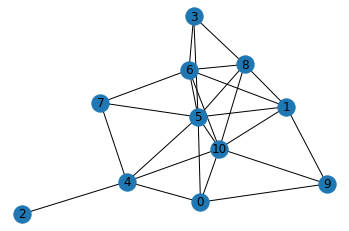

In [195]:
pos=diccio
fig, ax = plt.subplots()
nx.draw(G,pos=pos,with_labels=True)
plt.show()

In [196]:
import plotly.express as px
fig = px.scatter(y=latitud,x=longitud,hover_data=[distancias_df.index])
fig.show()

In [200]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28556 sha256=31bfe39dccae99047b3f8720f713d30d9742ba71dc9c9f827dcf8f610bd969a9
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [215]:
import matplotlib.pyplot as plt
import mplleaflet
import networkx as nx


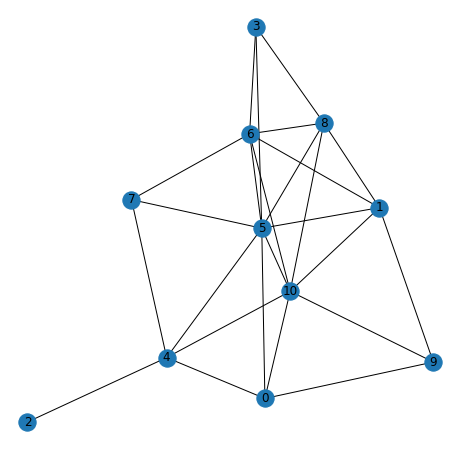

In [226]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
pos=diccio

nx.draw(G,pos=pos,with_labels=True)

plt.show()
#mplleaflet.display(fig=fig)
mplleaflet.display(fig=fig)